<a href="https://colab.research.google.com/github/DanShash/IncomePrediction/blob/main/MainIncomePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import io
import pandas as pd
import sys

assert sys.version_info >= (3, 7)

In [ ]:
from packaging import version
import sklearn
import seaborn as sns

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
data = files.upload()

Saving incomea.csv to incomea.csv


In [ ]:
df = pd.read_csv(io.StringIO(data['incomea.csv'].decode()))

In [ ]:
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [ ]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [ ]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [ ]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [ ]:
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass).add_prefix('workclass_')], axis=1)
df= df.drop('education', axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status']).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country']).add_prefix('native-country_')], axis=1)
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation).add_prefix('occupation_')], axis=1)

In [ ]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,Male,0,0,40,<=50K,False,False,...,False,False,True,False,False,False,False,False,False,False
1,38,89814,9,Male,0,0,50,<=50K,False,False,...,True,False,False,False,False,False,False,False,False,False
2,28,336951,12,Male,0,0,40,>50K,False,False,...,False,False,False,False,False,False,True,False,False,False
3,44,160323,10,Male,7688,0,40,>50K,False,False,...,False,False,True,False,False,False,False,False,False,False
4,18,103497,10,Female,0,0,30,<=50K,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,Female,0,0,38,<=50K,False,False,...,False,False,False,False,False,False,False,False,True,False
48838,40,154374,9,Male,0,0,40,>50K,False,False,...,False,False,True,False,False,False,False,False,False,False
48839,58,151910,9,Female,0,0,40,<=50K,False,False,...,False,False,False,False,False,False,False,False,False,False
48840,22,201490,9,Male,0,0,20,<=50K,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
df['gender'] = df['gender'].apply(lambda x: 1 if x == 'Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [ ]:
df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
0,25,226802,7,1,0,0,40,0,False,False,...,False,False,True,False,False,False,False,False,False,False
1,38,89814,9,1,0,0,50,0,False,False,...,True,False,False,False,False,False,False,False,False,False
2,28,336951,12,1,0,0,40,1,False,False,...,False,False,False,False,False,False,True,False,False,False
3,44,160323,10,1,7688,0,40,1,False,False,...,False,False,True,False,False,False,False,False,False,False
4,18,103497,10,0,0,0,30,0,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,257302,12,0,0,0,38,0,False,False,...,False,False,False,False,False,False,False,False,True,False
48838,40,154374,9,1,0,0,40,1,False,False,...,False,False,True,False,False,False,False,False,False,False
48839,58,151910,9,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
48840,22,201490,9,1,0,0,20,0,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

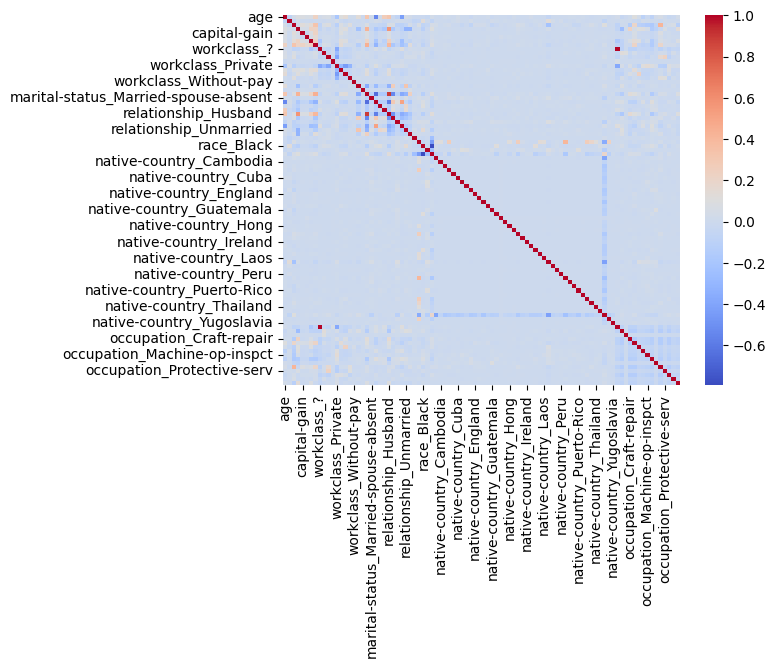

In [ ]:
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')

In [ ]:
df.corr()

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
age,1.000000,-0.076628,0.030940,0.088120,0.077229,0.056944,0.071558,0.230369,0.026931,0.049867,...,0.034117,-0.091945,-0.016995,-0.086321,0.024485,0.053155,0.002673,-0.032101,-0.019027,0.032961
fnlwgt,-0.076628,1.000000,-0.038761,0.027739,-0.003706,-0.004366,-0.013519,-0.006339,-0.005625,-0.009996,...,-0.028563,0.024692,0.008626,-0.005503,0.003220,-0.015155,0.016104,0.002764,0.001307,0.004021
educational-num,0.030940,-0.038761,1.000000,0.009328,0.125146,0.080972,0.143689,0.332613,-0.079304,0.058072,...,-0.106429,-0.127695,-0.156943,-0.168937,-0.068833,0.417956,0.002622,0.035717,0.060942,-0.117282
gender,0.088120,0.027739,0.009328,1.000000,0.047094,0.045480,0.228560,0.214628,-0.064010,0.005861,...,0.100895,0.093415,0.035716,-0.153990,-0.091531,-0.025639,0.063143,-0.016825,-0.021201,0.132720
capital-gain,0.077229,-0.003706,0.125146,0.047094,1.000000,-0.031441,0.082157,0.223013,-0.019062,-0.003633,...,-0.008644,-0.022473,-0.026324,-0.038725,-0.008465,0.085070,-0.006962,0.008983,-0.009575,-0.019256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
occupation_Prof-specialty,0.053155,-0.015155,0.417956,-0.025639,0.085070,0.045043,0.057104,0.188793,-0.093772,0.026315,...,-0.067465,-0.080050,-0.097672,-0.127333,-0.026837,1.000000,-0.054506,-0.135537,-0.066430,-0.085601
occupation_Protective-serv,0.002673,0.016104,0.002622,0.063143,-0.006962,-0.000888,0.027377,0.024873,-0.035336,0.015711,...,-0.025423,-0.030165,-0.036806,-0.047983,-0.010113,-0.054506,1.000000,-0.051074,-0.025033,-0.032257
occupation_Sales,-0.032101,0.002764,0.035717,-0.016825,0.008983,0.008426,0.009401,0.023977,-0.087867,-0.055411,...,-0.063216,-0.075009,-0.091522,-0.119315,-0.025147,-0.135537,-0.051074,1.000000,-0.062247,-0.080211
occupation_Tech-support,-0.019027,0.001307,0.060942,-0.021201,-0.009575,0.004315,-0.009892,0.020951,-0.043066,0.038383,...,-0.030984,-0.036764,-0.044857,-0.058479,-0.012325,-0.066430,-0.025033,-0.062247,1.000000,-0.039314


In [ ]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8 * len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

<Axes: >

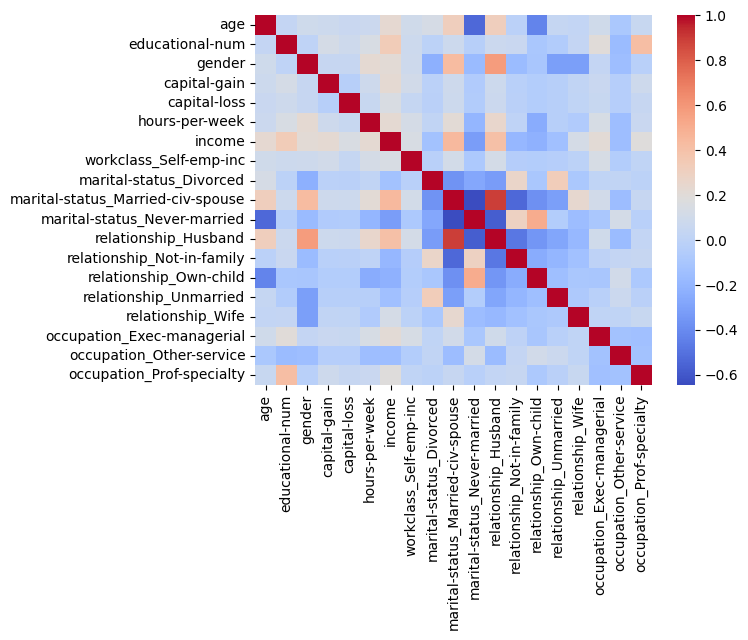

In [ ]:
sns.heatmap(df_dropped.corr(), annot=False, cmap='coolwarm')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
train_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
37193,42,145175,10,1,0,0,40,0,False,False,...,False,False,True,False,False,False,False,False,False,False
31093,52,175029,6,1,0,0,35,0,False,False,...,False,False,False,False,False,False,False,False,False,False
33814,34,172664,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
14500,28,125791,9,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
23399,46,28419,11,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,36,635913,9,1,0,0,40,0,False,False,...,False,False,False,True,False,False,False,False,False,False
44732,34,107624,10,1,0,0,50,0,False,False,...,False,False,False,False,False,False,False,False,False,False
38158,28,250135,10,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False
860,46,96652,11,0,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
test_df

,age,fnlwgt,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,workclass_?,workclass_Federal-gov,...,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving
7762,56,33115,9,0,0,0,40,0,False,False,...,False,False,False,True,False,False,False,False,False,False
23881,25,112847,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,True
30507,43,170525,13,0,14344,0,40,1,False,False,...,False,False,False,False,False,True,False,False,False,False
28911,32,186788,9,1,0,0,40,0,False,False,...,False,False,False,False,False,False,False,False,False,True
19484,39,277886,13,0,0,0,30,0,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43046,50,100480,14,1,0,0,60,1,False,False,...,False,False,False,False,False,False,False,False,False,False
18798,51,106728,13,1,5178,0,60,1,False,False,...,False,False,False,False,False,False,False,False,False,False
29519,25,167835,13,0,0,0,38,1,False,False,...,False,False,False,False,False,True,False,False,False,False
550,18,170194,7,1,0,0,25,0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
train_X = train_df.drop('income', axis=1)
train_y = train_df['income']

test_X = test_df.drop('income', axis=1)
test_y = test_df['income']

In [ ]:
forest = RandomForestClassifier()

forest.fit(train_X, train_y)

RandomForestClassifier()

In [ ]:
forest.score(test_X, test_y)

0.8633432285802027

In [ ]:
forest.feature_importances_

array([1.49557257e-01, 1.72204651e-01, 1.11535168e-01, 1.03868446e-02,
       9.70039652e-02, 3.29137362e-02, 8.56365520e-02, 1.75826625e-03,
       4.95989317e-03, 4.93844705e-03, 2.51636356e-06, 8.65631684e-03,
       5.52073031e-03, 7.24377298e-03, 4.12235392e-03, 1.33896027e-04,
       6.42210806e-03, 2.63401222e-04, 6.03670334e-02, 9.07809195e-04,
       2.89791925e-02, 1.70522863e-03, 1.46712160e-03, 4.50758284e-02,
       9.54375748e-03, 1.41912476e-03, 1.05204842e-02, 6.95618074e-03,
       9.48549031e-03, 1.24699281e-03, 2.81961156e-03, 4.49242333e-03,
       9.06845027e-04, 5.57915266e-03, 2.36279728e-03, 2.88696661e-04,
       1.20956479e-03, 5.37387752e-04, 2.97571941e-04, 6.94836637e-04,
       2.03819371e-04, 1.52758809e-04, 2.21110390e-04, 7.88380920e-04,
       3.51703670e-04, 9.21922717e-04, 4.21116960e-04, 1.22795476e-04,
       1.92741132e-04, 5.48218609e-07, 2.76468112e-05, 1.25416790e-04,
       1.42816759e-04, 8.73067152e-04, 5.04513922e-04, 2.71168365e-04,
      

In [ ]:
forest.feature_names_in_

array(['age', 'fnlwgt', 'educational-num', 'gender', 'capital-gain',
       'capital-loss', 'hours-per-week', 'workclass_?',
       'workclass_Federal-gov', 'workclass_Local-gov',
       'workclass_Never-worked', 'workclass_Private',
       'workclass_Self-emp-inc', 'workclass_Self-emp-not-inc',
       'workclass_State-gov', 'workclass_Without-pay',
       'marital-status_Divorced', 'marital-status_Married-AF-spouse',
       'marital-status_Married-civ-spouse',
       'marital-status_Married-spouse-absent',
       'marital-status_Never-married', 'marital-status_Separated',
       'marital-status_Widowed', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Other-relative',
       'relationship_Own-child', 'relationship_Unmarried',
       'relationship_Wife', 'race_Amer-Indian-Eskimo',
       'race_Asian-Pac-Islander', 'race_Black', 'race_Other',
       'race_White', 'native-country_?', 'native-country_Cambodia',
       'native-country_Canada', 'native-country_Chi

In [ ]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [ ]:
importances

{'fnlwgt': 0.17220465140578875,
 'age': 0.149557257176696,
 'educational-num': 0.1115351677090033,
 'capital-gain': 0.0970039652411842,
 'hours-per-week': 0.08563655197079917,
 'marital-status_Married-civ-spouse': 0.060367033397825426,
 'relationship_Husband': 0.04507582843468022,
 'capital-loss': 0.032913736202295166,
 'marital-status_Never-married': 0.028979192458224428,
 'occupation_Exec-managerial': 0.017600500604796482,
 'occupation_Prof-specialty': 0.016519277929518236,
 'relationship_Own-child': 0.010520484185521222,
 'gender': 0.010386844572379367,
 'relationship_Not-in-family': 0.009543757481252949,
 'relationship_Wife': 0.009485490305004018,
 'workclass_Private': 0.00865631683617988,
 'workclass_Self-emp-not-inc': 0.007243772983697283,
 'occupation_Other-service': 0.007176937067365616,
 'relationship_Unmarried': 0.006956180744638717,
 'marital-status_Divorced': 0.006422108063814907,
 'occupation_Sales': 0.005737272010320283,
 'native-country_United-States': 0.0057104450379124

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50,100,250],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(),
                           param_grid=param_grid, verbose=10)

In [ ]:
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.841 total time=   1.3s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.825 total time=   1.2s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.840 total time=   1.2s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50;, score=0.837 total time=   1.2s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=50
[CV 

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [50, 100, 250]},
             verbose=10)

In [ ]:
forest = grid_search.best_estimator_

In [ ]:
forest.score(test_X, test_y)

0.8708158460436073